# Regressão Linear 

## Exemplo - predição do valor de uma corrida de táxi

Vamos usar a regressão linear para predizer o valor a ser pago em uma corrida de táxi.

## Bibliotecas auxiliares

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore')

O nosso conjunto de dados contém as corridas de táxi da cidade de New York:

In [3]:
df = pd.read_csv("data\dataset.csv")

In [4]:
df.shape

(1000000, 8)

#### Descrição do conjunto de dados

|Campo            | Descrição                                                  |
|-----------------|------------------------------------------------------------|
|key              |chave única indicando cada exemplo                          |
|**fare_amount**  |valor, em doláres, indicando o valor pago na corrida de táxi|
|pickup_datetime  |timestamp indicando quando a corrida começou                |
|pickup_longitude |longitude na qual a corrida de táxi começou                 |
|pickup_latitude  |latitude na qual a corrida de táxi começou                  |
|dropoff_longitude|longitude na qual a corrida de táxi acabou                  |
|dropoff_latitude |latitude na qual a corrida de táxi acabou                   |
|passenger_count  |número de passageiros                                       |

In [5]:
df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


## Análise exploratória e Feature engineering

### Valores faltantes

In [7]:
print(f'Tamanho conjunto de dados (antes da remoção de valores faltantes): {len(df)}')
df.dropna(inplace=True)
print(f'Tamanho conjunto de dados (depois da remoção de valores faltantes): {len(df)}')

Tamanho conjunto de dados (antes da remoção de valores faltantes): 1000000
Tamanho conjunto de dados (depois da remoção de valores faltantes): 999990


### Distribuição das features

In [8]:
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key,999990,999990,2009-06-15 17:26:21.0000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,999990.0,NaN,NaN,NaN,11.347953,9.82179,-44.9,6.0,8.5,12.5,500.0
pickup_datetime,999990,861747,2010-02-13 19:28:00 UTC,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_longitude,999990.0,NaN,NaN,NaN,-72.526699,12.057778,-3377.680935,-73.99206,-73.981792,-73.967094,2522.271325
pickup_latitude,999990.0,NaN,NaN,NaN,39.92904,7.626087,-3116.285383,40.734965,40.752695,40.767154,2621.62843
dropoff_longitude,999990.0,NaN,NaN,NaN,-72.52786,11.324494,-3383.296608,-73.991385,-73.980135,-73.963654,45.581619
dropoff_latitude,999990.0,NaN,NaN,NaN,39.919954,8.201418,-3114.338567,40.734046,40.753166,40.768129,1651.553433
passenger_count,999990.0,NaN,NaN,NaN,1.684941,1.323907,0.0,1.0,1.0,2.0,208.0


### Análise das features (e do target)

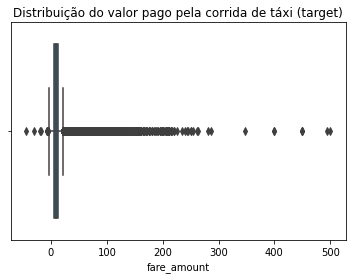

In [9]:
sns.boxplot(df.fare_amount).set_title("Distribuição do valor pago pela corrida de táxi (target)");

In [10]:
len(df.loc[(df.fare_amount < 1)])

75

In [11]:
len(df.loc[(df.fare_amount > 100)]) #.loc retorna rótulo de índice

396

In [12]:
df = df.loc[(df.fare_amount >= 1) & (df.fare_amount <= 100)]

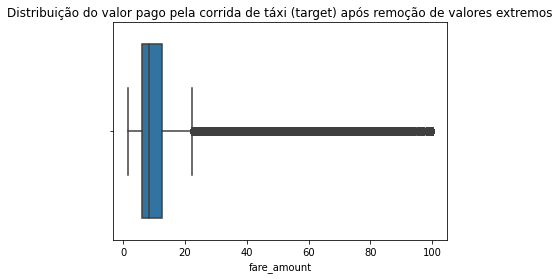

In [13]:
sns.boxplot(df.fare_amount).set_title("Distribuição do valor pago pela corrida de táxi (target) após remoção de valores extremos");

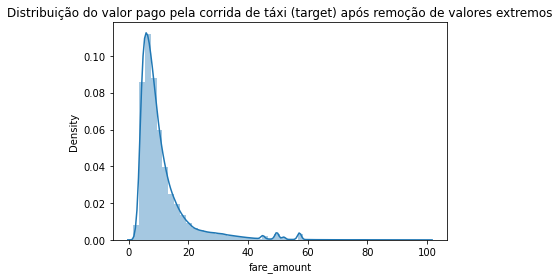

In [14]:
sns.distplot(df.fare_amount).set_title("Distribuição do valor pago pela corrida de táxi (target) após remoção de valores extremos");

In [15]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999519 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key                999519 non-null  object        
 1   fare_amount        999519 non-null  float64       
 2   pickup_datetime    999519 non-null  datetime64[ns]
 3   pickup_longitude   999519 non-null  float64       
 4   pickup_latitude    999519 non-null  float64       
 5   dropoff_longitude  999519 non-null  float64       
 6   dropoff_latitude   999519 non-null  float64       
 7   passenger_count    999519 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 68.6+ MB


In [16]:
# horário
df['pickup_hour']=df['pickup_datetime'].apply(lambda x:x.hour)
# dia da semana (0 é segunda e 6 é domingo)
df['pickup_day_of_week']=df['pickup_datetime'].apply(lambda x:x.weekday())
# dia
df['pickup_day']=df['pickup_datetime'].apply(lambda x:x.day)
# mês
df['pickup_month']=df['pickup_datetime'].apply(lambda x:x.month)
# ano
df['pickup_year']=df['pickup_datetime'].apply(lambda x:x.year)

In [17]:
df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0,15,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,1,5,1,2010


**Horário**

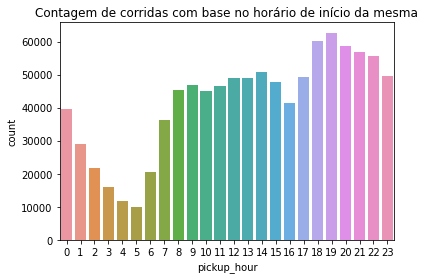

In [18]:
sns.countplot(df['pickup_hour']).set_title("Contagem de corridas com base no horário de início da mesma");

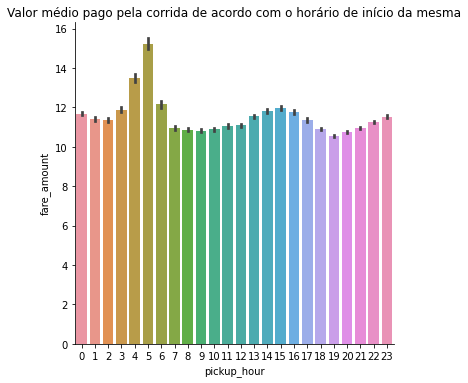

In [19]:
sns.catplot(x="pickup_hour", y="fare_amount", data=df,kind="bar").set(title="Valor médio pago pela corrida de acordo com o horário de início da mesma");

**Dia da semana**

In [20]:
# Vamos fazer a conversão dos dias da semana para facilitar a leitura
def convert_day_of_week(day_of_week):
    day_dict={0:'Segunda',1:'Terça',2:'Quarta',3:'Quinta',4:'Sexta',5:'Sábado',6:'Domingo'}
    return day_dict[day_of_week]

In [21]:
df['pickup_day_of_week_name']=df['pickup_day_of_week'].apply(lambda x:convert_day_of_week(x))

In [22]:
week_day_name = ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']

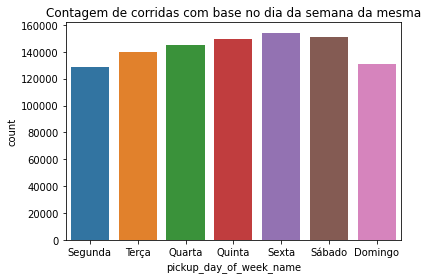

In [23]:
sns.countplot(df['pickup_day_of_week_name'],order=week_day_name).set_title("Contagem de corridas com base no dia da semana da mesma");

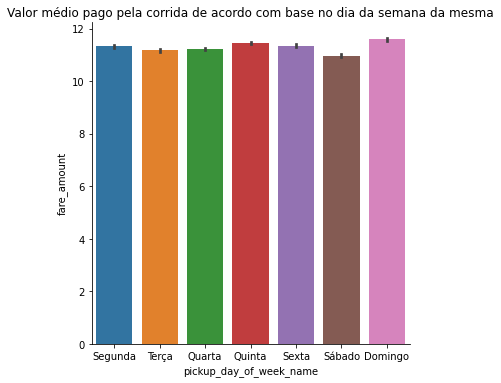

In [24]:
sns.catplot(x="pickup_day_of_week_name", y="fare_amount", data=df,
            order=week_day_name,kind="bar").set(title="Valor médio pago pela corrida de acordo com base no dia da semana da mesma");

**Dia**

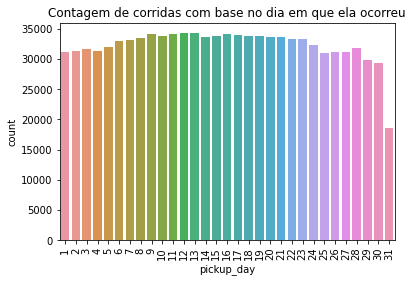

In [25]:
sns.countplot(df['pickup_day']).set_title("Contagem de corridas com base no dia em que ela ocorreu");
plt.xticks(rotation=90);

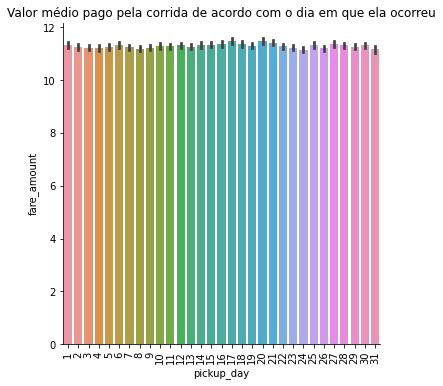

In [26]:
sns.catplot(x="pickup_day", y="fare_amount", data=df,kind="bar").set(title="Valor médio pago pela corrida de acordo com o dia em que ela ocorreu");
plt.xticks(rotation=90);

**Mês**

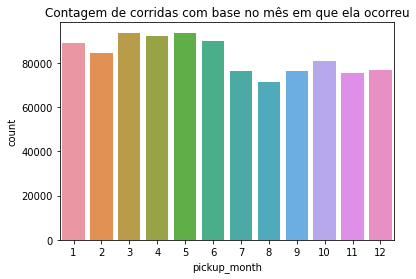

In [27]:
sns.countplot(df['pickup_month']).set_title("Contagem de corridas com base no mês em que ela ocorreu");

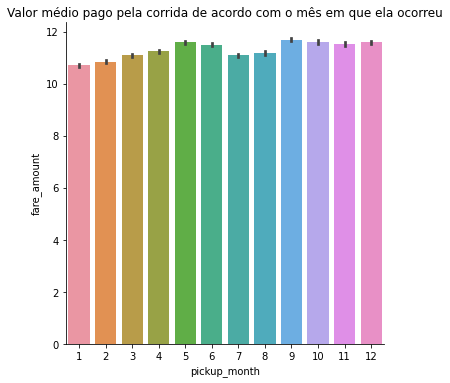

In [28]:
sns.catplot(x="pickup_month", y="fare_amount", data=df,kind="bar").set(title="Valor médio pago pela corrida de acordo com o mês em que ela ocorreu");

**Ano**

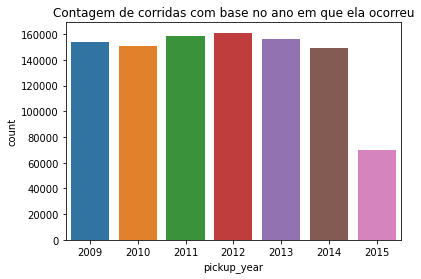

In [29]:
sns.countplot(df['pickup_year']).set_title("Contagem de corridas com base no ano em que ela ocorreu");

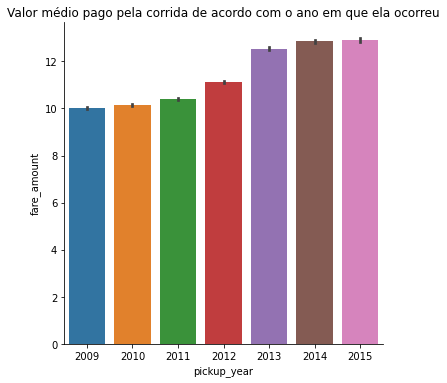

In [30]:
sns.catplot(x="pickup_year", y="fare_amount", data=df,kind="bar").set(title="Valor médio pago pela corrida de acordo com o ano em que ela ocorreu");

**`latitude e longitude`**

In [31]:
df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,999519.000000,999519.000000,999519.000000,999519.000000
mean,39.930365,-72.529162,39.921741,-72.531198
std,7.623472,12.051418,8.198080,11.314573
min,-3116.285383,-3377.680935,-3114.338567,-3383.296608
25%,40.734977,-73.992061,40.734055,-73.991382
50%,40.752697,-73.981796,40.753166,-73.980136
75%,40.767151,-73.967110,40.768122,-73.963666
max,2621.628430,2522.271325,1651.553433,45.581619


In [32]:
print(f'Tamanho conjunto de dados (antes da remoção de valores faltantes): {len(df)}')
df = df.loc[(df.pickup_latitude>=-90) & (df.pickup_latitude<=90)]
df = df.loc[(df.pickup_longitude>=-180) & (df.pickup_longitude<=180)]
df = df.loc[(df.dropoff_latitude>=-90) & (df.dropoff_latitude<=90)]
df = df.loc[(df.dropoff_longitude>=-180) & (df.dropoff_longitude<=180)]
print(f'Tamanho conjunto de dados (depois da remoção de valores faltantes): {len(df)}')

Tamanho conjunto de dados (antes da remoção de valores faltantes): 999519
Tamanho conjunto de dados (depois da remoção de valores faltantes): 999479


In [33]:
df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,999479.000000,999479.000000,999479.000000,999479.000000
mean,39.928068,-72.519762,39.927656,-72.518556
std,6.085292,10.385367,6.088085,10.386105
min,-74.016587,-128.175950,-74.035197,-121.391248
25%,40.734977,-73.992060,40.734055,-73.991382
50%,40.752697,-73.981796,40.753165,-73.980136
75%,40.767151,-73.967110,40.768122,-73.963666
max,69.400000,40.850357,81.510177,45.581619


**Pontos de origem da corrida**

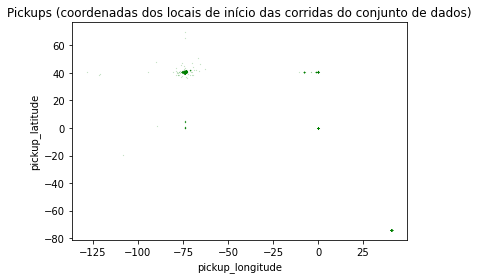

In [34]:
df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='green', 
                s=.02, alpha=.6)
plt.title("Pickups (coordenadas dos locais de início das corridas do conjunto de dados)");

In [35]:
long_interval = (-74.04, -73.75)
lat_interval = (40.63, 40.88)

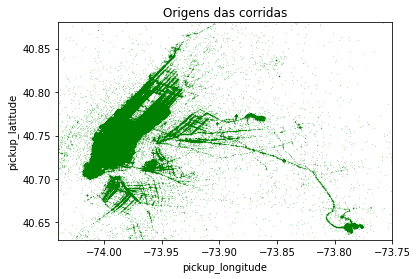

In [36]:
df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='green', 
                s=.02, alpha=.6)
plt.title("Origens das corridas")
plt.ylim(lat_interval)
plt.xlim(long_interval);

In [37]:
print(f'Tamanho conjunto de dados (antes da remoção de valores faltantes): {len(df)}')
df = df.loc[(df.pickup_latitude>=40.63) & (df.pickup_latitude<=40.88)]
df = df.loc[(df.pickup_longitude>=-74.04) & (df.pickup_longitude<=-73.75)]
df = df.loc[(df.dropoff_latitude>=40.63) & (df.dropoff_latitude<=40.88)]
df = df.loc[(df.dropoff_longitude>=-74.04) & (df.dropoff_longitude<=-73.75)]
print(f'Tamanho conjunto de dados (depois da remoção de valores faltantes): {len(df)}')

Tamanho conjunto de dados (antes da remoção de valores faltantes): 999479
Tamanho conjunto de dados (depois da remoção de valores faltantes): 970979


**Pontos de destino da corrida**

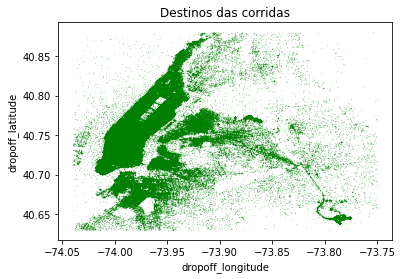

In [38]:
df.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='green', 
                s=.02, alpha=.6)
plt.title("Destinos das corridas");

In [39]:
df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

In [40]:
df[['abs_diff_latitude', 'abs_diff_longitude']].describe()

,abs_diff_latitude,abs_diff_longitude
count,970979.000000,970979.000000
mean,0.020785,0.022129
std,0.021742,0.032358
min,0.000000,0.000000
25%,0.006921,0.006116
50%,0.014084,0.012630
75%,0.026880,0.023665
max,0.237560,0.260020


**`passenger_count`**

In [41]:
len(df.loc[df.passenger_count<1])

3466

In [42]:
len(df.loc[df.passenger_count>4])

89097

In [43]:
df = df.loc[(df.passenger_count > 0) & (df.passenger_count<5)]

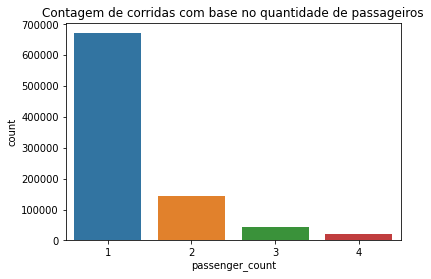

In [44]:
sns.countplot(df['passenger_count']).set_title("Contagem de corridas com base no quantidade de passageiros");

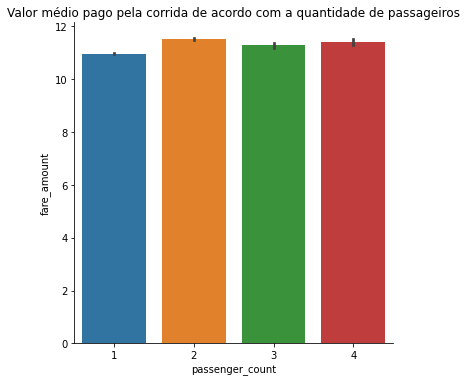

In [45]:
sns.catplot(x="passenger_count", y="fare_amount", data=df,kind="bar").set(title="Valor médio pago pela corrida de acordo com a quantidade de passageiros");

### Correlação

### Regressão Linear Simples

In [46]:
# import da regressão linear
from sklearn.linear_model import LinearRegression

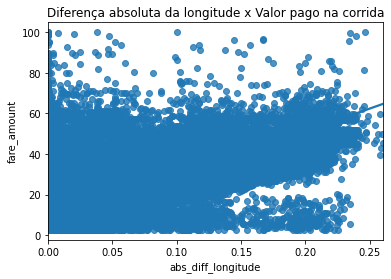

In [47]:
# Fazer um scatterplot com a feature que escolhemos
# TODO

grafico = sns.regplot(x=df['abs_diff_longitude'], y=df['fare_amount']).set_title("Diferença absoluta da longitude x Valor pago na corrida");

In [48]:
# Ver a correlação entre o target e a feature

from scipy.stats.stats import pearsonr

target = df['abs_diff_longitude']
feature = df['fare_amount']

coeficiente_pearsonr, p_valor = pearsonr(target, feature)
print('PearsonR Correlation Coefficient {:0.3}'.format(coeficiente_pearsonr))

PearsonR Correlation Coefficient 0.825


In [49]:
#Pearson com Pandas

X = df[['abs_diff_longitude', 'fare_amount']]

corr = X.corr()
corr

,abs_diff_longitude,fare_amount
abs_diff_longitude,1.000000,0.825056
fare_amount,0.825056,1.000000


#### Separação do conjunto de treino e teste

In [50]:
# Colocar o nosso target na variável Y
# Colocar o restante das features na variável X

Y = df['fare_amount']
del df['fare_amount']
X = df

In [51]:
# Separar nosso conjunto de dados entre treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [52]:
print(X_train.shape)
X_train.head(1)

(614891, 15)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year,pickup_day_of_week_name,abs_diff_longitude,abs_diff_latitude
401364,2015-04-01 09:35:10.0000001,2015-04-01 09:35:10,-73.90744,40.753376,-73.930832,40.744534,1,9,2,1,4,2015,Quarta,0.023392,0.008842


In [53]:
print(Y_train.shape)
Y_train.head(1)

(614891,)


401364    8.0
Name: fare_amount, dtype: float64

In [54]:
print(X_test.shape)
X_test.head(1)

(263525, 15)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year,pickup_day_of_week_name,abs_diff_longitude,abs_diff_latitude
823733,2011-02-26 20:26:00.000000110,2011-02-26 20:26:00,-73.862735,40.76883,-73.969447,40.797897,1,20,5,26,2,2011,Sábado,0.106712,0.029067


#### Treinamento do modelo

In [55]:
# instancia a regressão linear
lm = LinearRegression()
# como vamos utilizar somente uma feature, vamos passar somente ela para treinar o modelo
lm.fit(X_train[['abs_diff_longitude']], Y_train)

LinearRegression()

#### Predição

In [56]:
# para fazer a predição também só devemos utilizar a feature fornecida no treinamento
Y_pred = lm.predict(X_test[['abs_diff_longitude']])

#no predict eu normalmente uso o teste (posso usar o treino para avaliar)

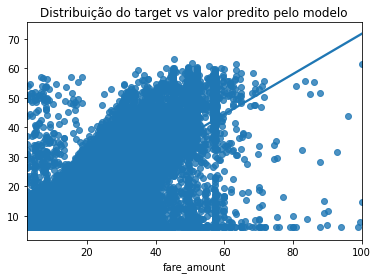

In [57]:
_ = sns.regplot(x=Y_test, y=Y_pred).set_title("Distribuição do target vs valor predito pelo modelo");

In [58]:
# vamos pegar de exemplo para analisar o resultado

exemplo = lm.predict(X_test[['abs_diff_longitude']])

In [59]:
# aqui conseguimos pegar os coeficientes que compõem a equação da regressão linear

beta=lm.coef_
intercept=lm.intercept_
print(beta)
print(intercept)

[225.37880345]
6.081784576615161


In [60]:
# Criar a fórmula da regressão linear

(beta[0] + exemplo) + intercept

array([261.59299548, 239.95730649, 240.52300728, ..., 238.88720793,
       241.0544505 , 237.56220594])

In [61]:
# Substituir o valor do exemplo na fórmula e verificar se o resultado é o mesmo que o modelo predisse

(beta[0] + 0.022119) + intercept

231.48270703082767

## Métricas de avaliação

Existem diversas métricas para avaliar o erro da predição do nosso modelo. Hoje iremos ver as seguintes:
- MSE (Mean Squared Error)
- MAE (Mean Absolute Error)
- R²

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**`MSE`**

In [74]:
# Calcular o MSE

mse = mean_squared_error(Y_test, Y_pred)
mse

24.69710970369658

**`MAE`**

In [75]:
# Calcular o MAE

mae = mean_absolute_error(Y_test, Y_pred)
mae

3.187726331050997

**`R²`**

In [76]:
# Calcular o R2

r2_score(Y_test, Y_pred)

0.6810560930980911

## Regressão Linear Múltipla

In [77]:
# Colocar todas as features que iremos utilizar em um array

columns = ['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
           'passenger_count', 'pickup_hour', 'pickup_day_of_week', 'pickup_day',
           'pickup_month', 'pickup_year', 'abs_diff_longitude', 'abs_diff_latitude']

In [78]:
lm.fit(X_train[columns], Y_train)

LinearRegression()

In [79]:
Y_pred = lm.predict(X_test[columns])

In [80]:
# Ver os coeficientes

beta=lm.coef_
intercept=lm.intercept_
print(beta)
print(intercept)

[ 1.49637825e+01  2.73799571e+00  7.60703102e+00 -1.84254424e+01
  1.16782653e-01  1.12910876e-02 -3.34790721e-02  1.12680885e-03
  6.69584128e-02  4.91295570e-01  1.60929729e+02  1.37055478e+02]
1324.6273746789102


In [81]:
weights = pd.DataFrame(list(zip(columns, lm.coef_.tolist())),columns=['names', 'coefs'])
weights

,names,coefs
0,pickup_longitude,14.963782
1,pickup_latitude,2.737996
2,dropoff_longitude,7.607031
3,dropoff_latitude,-18.425442
4,passenger_count,0.116783
5,pickup_hour,0.011291
6,pickup_day_of_week,-0.033479
7,pickup_day,0.001127
8,pickup_month,0.066958
9,pickup_year,0.491296


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'pickup_longitude'),
  Text(1, 0, 'pickup_latitude'),
  Text(2, 0, 'dropoff_longitude'),
  Text(3, 0, 'dropoff_latitude'),
  Text(4, 0, 'passenger_count'),
  Text(5, 0, 'pickup_hour'),
  Text(6, 0, 'pickup_day_of_week'),
  Text(7, 0, 'pickup_day'),
  Text(8, 0, 'pickup_month'),
  Text(9, 0, 'pickup_year'),
  Text(10, 0, 'abs_diff_longitude'),
  Text(11, 0, 'abs_diff_latitude')])

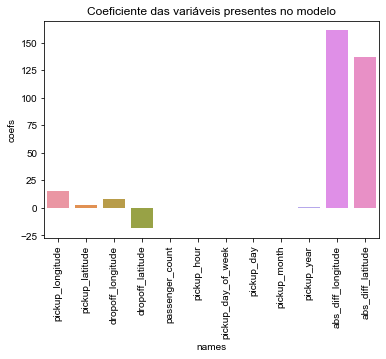

In [82]:
# Usar um barplot para visualizar esses coeficientes por feature

sns.barplot(x="names", y="coefs", data=weights).set_title("Coeficiente das variáveis presentes no modelo")
sns.set(rc={'figure.figsize':(12,8)})
plt.xticks(rotation = 90)

**Treinar o modelo novamente só removendo as features correlacionadas; fazer a predição no conjunto de teste; verificar os erros.**

In [84]:
lm.fit(X_train[['passenger_count', 'pickup_hour', 'pickup_day_of_week', 'pickup_day',
       'pickup_month', 'pickup_year','abs_diff_longitude', 'abs_diff_latitude']], Y_train)

LinearRegression()

In [85]:
Y_pred = lm.predict(X_test[['passenger_count', 'pickup_hour', 'pickup_day_of_week', 'pickup_day',
       'pickup_month', 'pickup_year','abs_diff_longitude', 'abs_diff_latitude']])

In [86]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

2.366005139311909

In [87]:
r2_score(Y_test, Y_pred)

0.7738888492753324